In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [40]:
#carregando a base 
dados=pd.read_csv('dataframe_dados.csv')
dados=pd.DataFrame(dados)

In [41]:
#conferindo se as variáveis estão corretas
dados.dtypes

Unnamed: 0                                  int64
sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64


In [42]:
X = dados.drop('mau', axis=1) #em dados, selecionar todas com excessão da variável mau

In [43]:
y = dados.mau #em dados, selecionar apenas mau

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) #30% separada para teste #70%para teino

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [45]:
#1)
modelo_treino= DecisionTreeClassifier(random_state=100)
modelo_treino

DecisionTreeClassifier(random_state=100)

In [46]:
#2) treinando a arvore com x_train e y_train
modelo_treino = modelo_treino.fit(X_train, y_train)
modelo_treino

DecisionTreeClassifier(random_state=100)

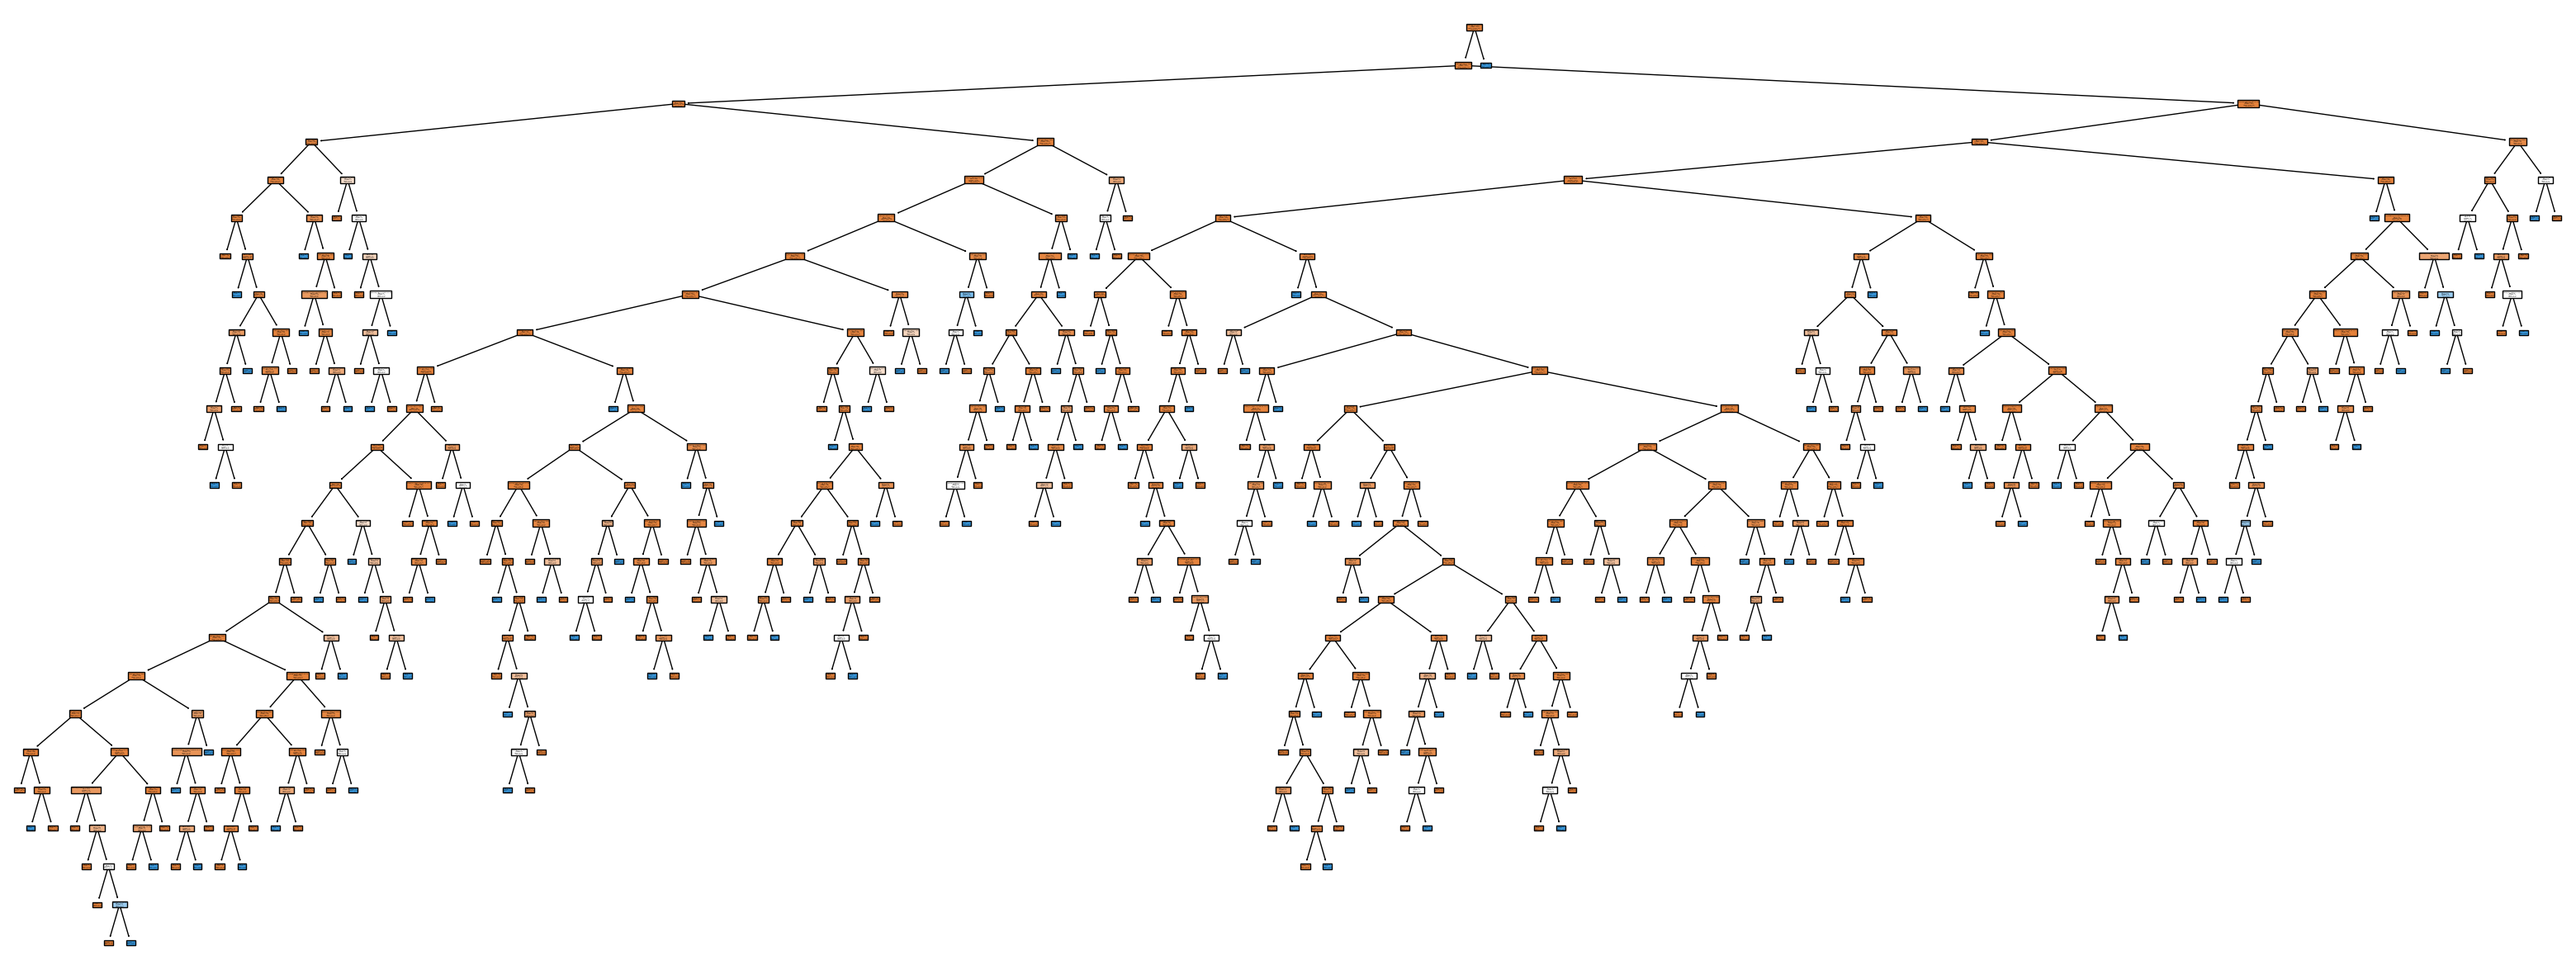

In [47]:
#3)
plt.figure(figsize=(40, 15))
plot_tree(modelo_treino,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns);

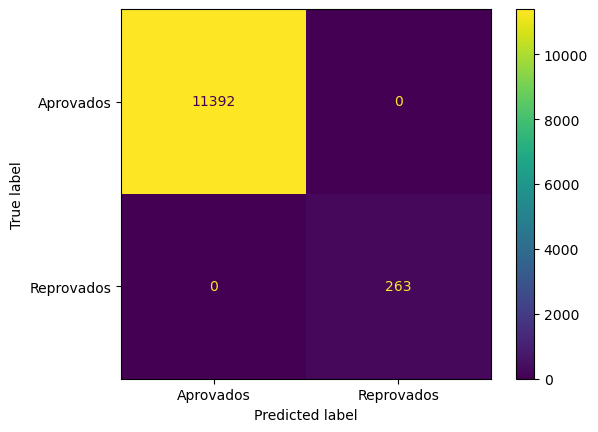

In [48]:
#4)
ConfusionMatrixDisplay.from_estimator(modelo_treino, X_train,y_train, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [49]:
#5) quando você afunila demais a árvore, com muitas ramificações, acaba tendo um overfitting
predict_train = modelo_treino.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
accuracy_score(y_train, predict_train)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [51]:
#1)
predict_test=modelo_treino.predict(X_test)
predict_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

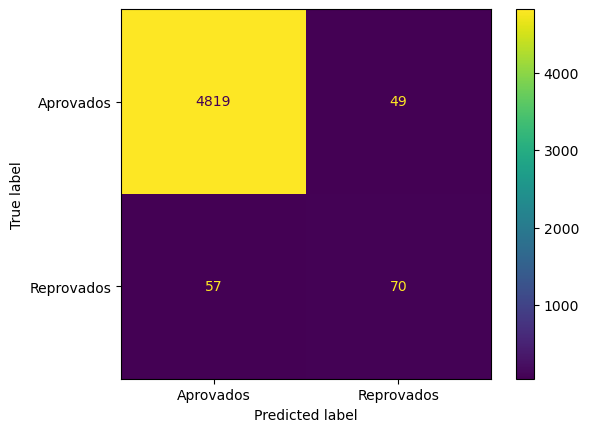

In [52]:
#2) matriz de confusão, utiliza-se o modelo de treino, mas para as váriaveis de teste
ConfusionMatrixDisplay.from_estimator(modelo_treino, X_test,y_test, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [18]:
#3) Acurácia da base teste:
acuracia_teste=(4819+70)/(4819+49+57+70)
acuracia_teste

0.9787787787787787

Apesar de bem alta, a acurácia da base teste ainda é menor que a da base de treinamento, visto que a árvore de treinamento está extremamente afunilada, trazendo 100% de acurácia. 

In [53]:
#3) Acurácia feita passo a passo:
accuracy_score(y_test, predict_test)

0.9787787787787787

In [54]:
#4.1) treino de uma árvore com profundidade 10 e nº mín de observações por folha igual a 5.
modelo_teste = DecisionTreeClassifier(max_depth=10, random_state=123)
modelo_teste= DecisionTreeClassifier(min_samples_leaf=5, random_state=123)
modelo_teste= modelo_teste.fit(X_train,y_train)

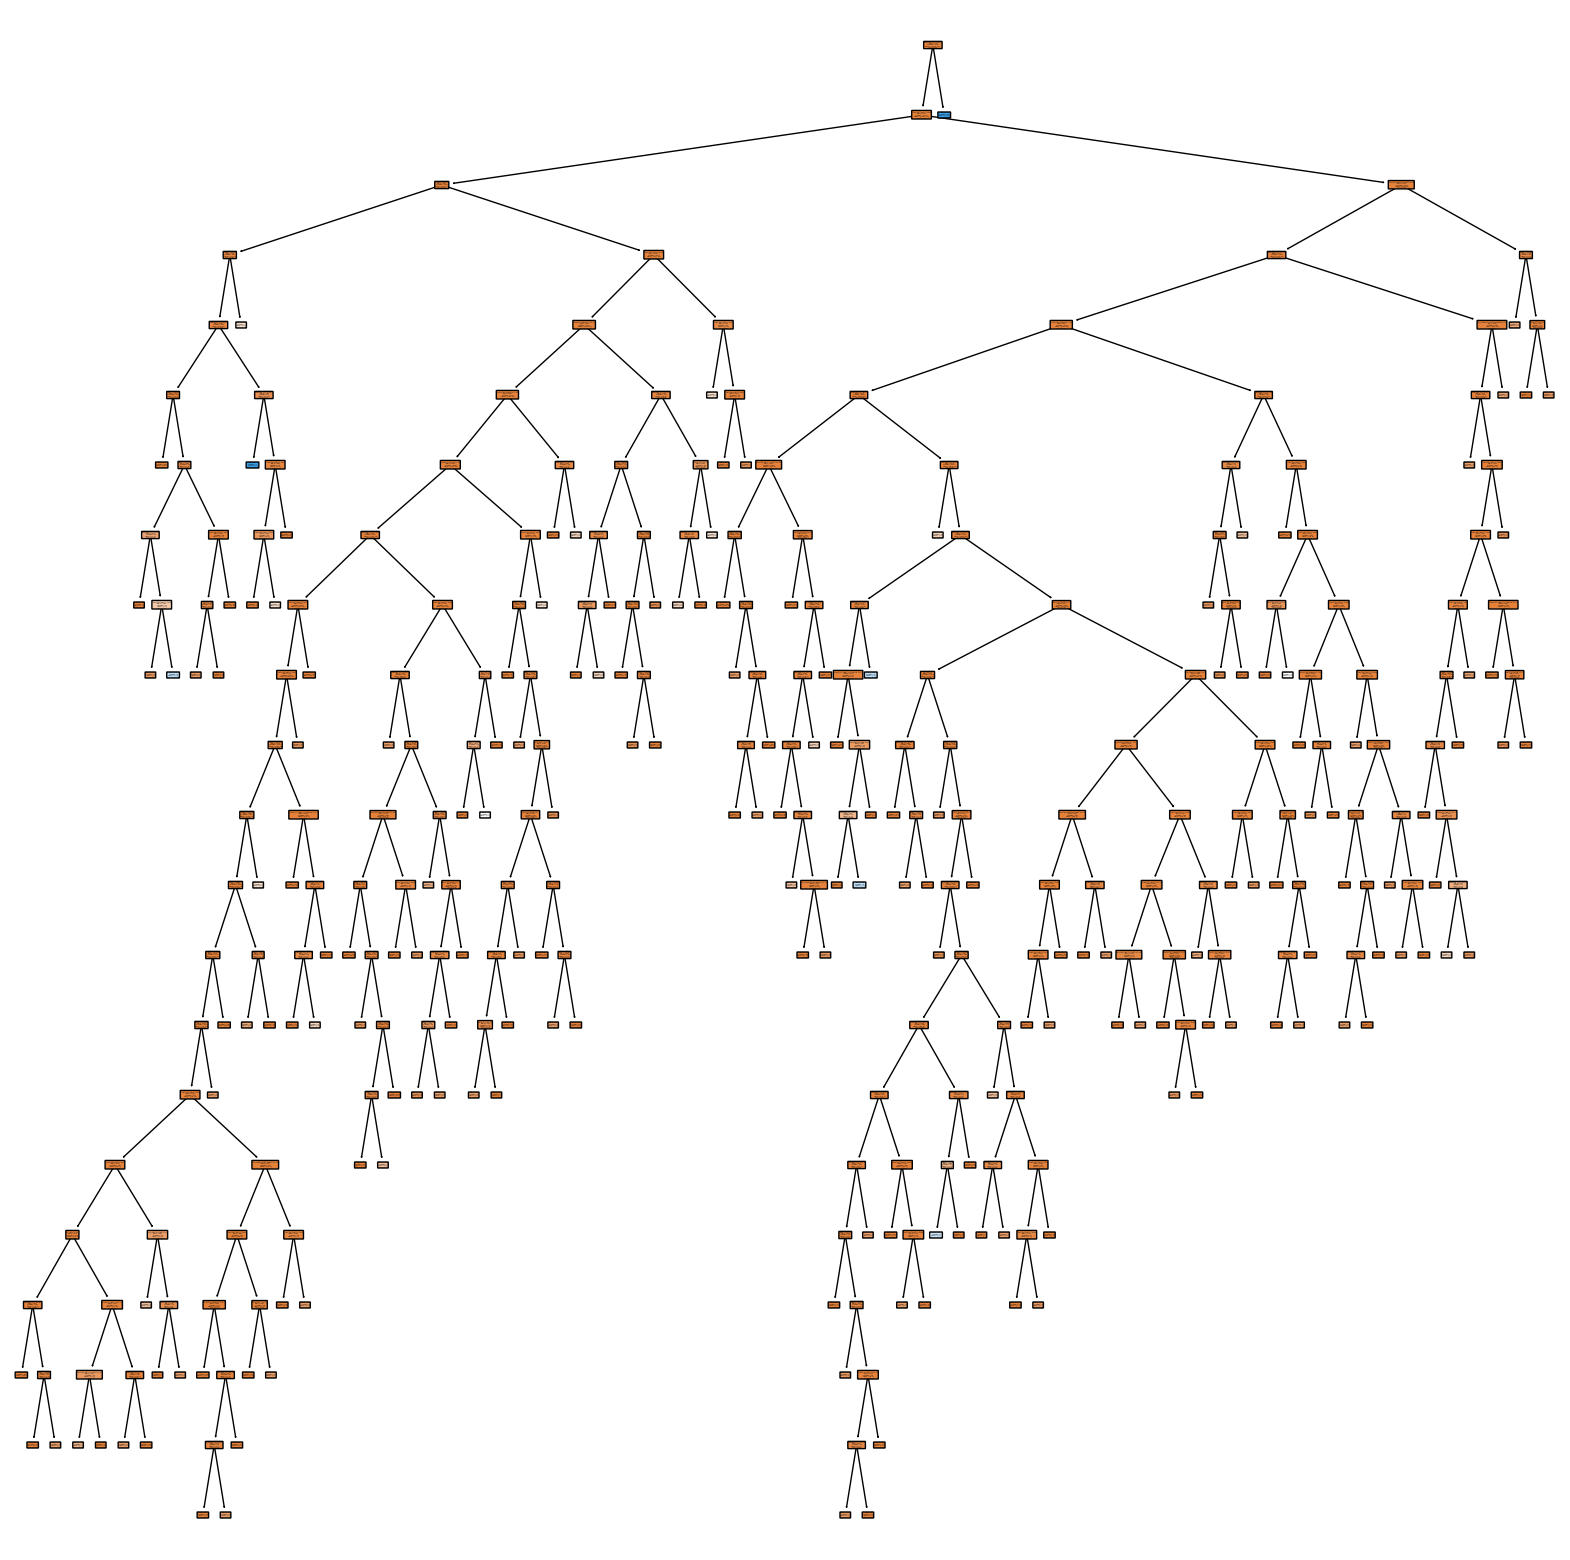

In [55]:
#4.2) árvore
plt.figure(figsize=[20,20])
plot_tree(modelo_teste,
         filled=True,
         rounded=True,
         class_names=['Died', 'Survived'],
         feature_names=X_train.columns);

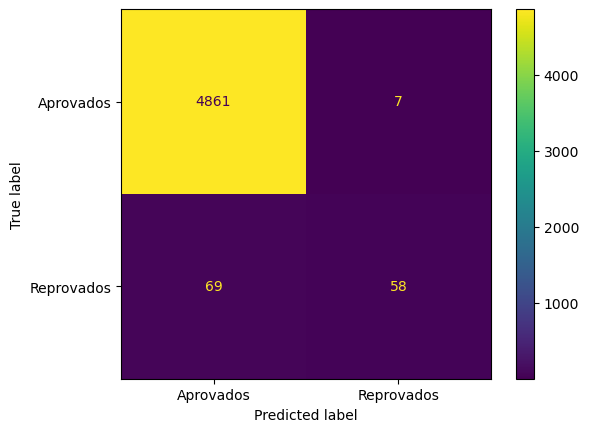

In [57]:
#4.3) Matriz de confusão
ConfusionMatrixDisplay.from_estimator(modelo_teste, X_test,y_test, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [56]:
#4.4) acurácia da matriz de confusão acima.
predict_teste_poda = modelo_teste.predict(X_test)
accuracy_score(y_test, predict_teste_poda)

0.9847847847847848

In [65]:
#4.5) Proporção de clientes classificados como mau:
mau= 58/(4861+7+69+58)
mau*100

1.1611611611611612

5) A acurácia seria de 100%, visto que o gini seria 0. 

In [68]:
dados_aprovado= dados.copy()

In [69]:
dados_aprovado.mau=dados_aprovado.mau.replace([0], [1])

In [70]:
X = dados_aprovado.drop('mau', axis=1) #em dados, selecionar todas com excessão da variável mau

In [71]:
y = dados_aprovado.mau #em dados, selecionar apenas mau

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) #30% separada para teste #70%para teino

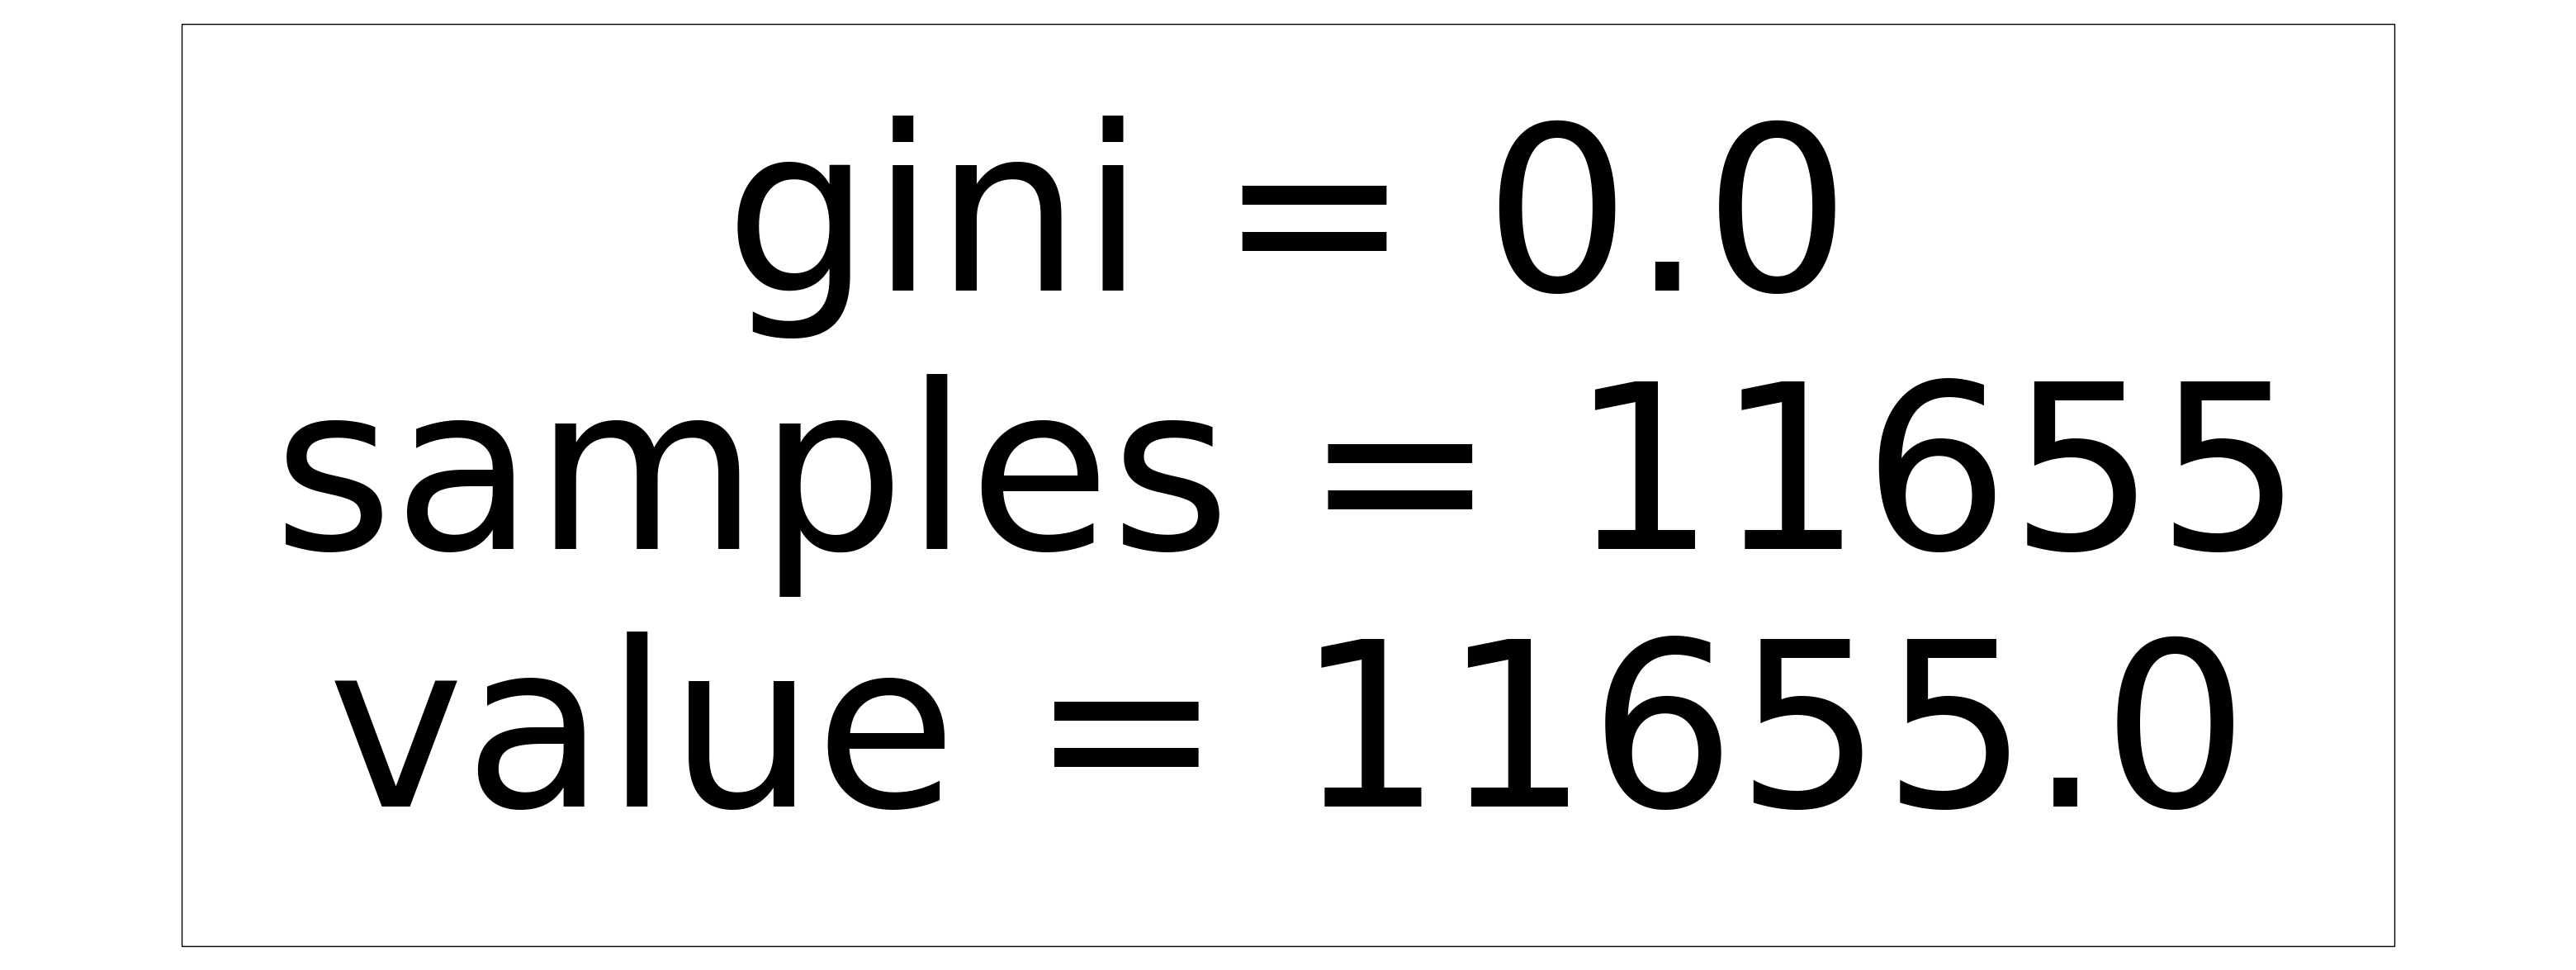

In [77]:
#árvore dos 70% separados para treino
modelo_treino= DecisionTreeClassifier(random_state=100)
modelo_treino = modelo_treino.fit(X_train, y_train)
plt.figure(figsize=(40, 15))
plot_tree(modelo_treino,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns);

In [78]:
#acurácia do modelo anterior para as variáveis de teste.
predict_test=modelo_treino.predict(X_test)
accuracy_score(y_test, predict_test)

1.0